## NYC Taxi Data Analysis

This data challegne is focued on NYC Taxi tip, the goal is to investigate the factor affecting taxi percentage by building model and data exploration

## Contents

* Loading Data
* Data Cleaning
* Data Exploration
* Feature Preprocessing
* Model Training and Evaluation
* Feature Selection

### 0. Loading Data

* Data Source: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv
* Data Info: http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

##### Question 1.1
   * Programmatically download and load into your favorite analytical tool the trip data for September 2015

In [3]:
#Directly loading dataset if had alrealy on local disk. otherwise download the dataset via internet and save it to disk
if os.path.exists('data_september_2015.csv'):
    data=pd.read_csv('data_september_2015.csv')
else:
    url='https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv'
    data=pd.read_csv(url)
    data.to_csv(url.split('/')[-1])

###### Question 1.2
   * Report how many rows and columns of data you have loaded.


In [4]:
print "Num of rows: " + str(data.shape[0]) # row count
print "Num of columns: " + str(data.shape[1]) # col count

Num of rows: 1494926
Num of columns: 21


### 1. Data Cleaning 

In [5]:
#First have a look at data
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
#Basic statistic for column values
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


#### 1.1 Processing missing value: 
   * Ehail_fee value NAN,remove Ehail_fee for most of its values are NAN(Not a Number)
  

In [7]:
#Calcualted the percentage of missing values in Ehail fee
data['Ehail_fee'].isnull().sum()/data.shape[0]
data=data.drop('Ehail_fee',axis=1)

* Trip_type,there are two common methods to deal with, one is to impute the data with mean, median or mode, the other is implemented by regression/classification to fill the miss data.Concerning the computational expersive, the first one will be adopted, since the Trip_type is categorial data, so it is better to impute with most frequent value/mode number

In [8]:
#Identify the exsitence of missing value of type_trip
np.any(data['Trip_type '].isnull())
#Identify the most frequent value of type_trip
pd.value_counts(data['Trip_type '])
#Replace the missing value with most frequent value 1
data['Trip_type '] = data['Trip_type '].replace(np.NaN,1)

#### 1.2 Processing abnormal/invalid data
   * Negative value: Fareamount,Tip_amount,Tolls_amount,improvement_surcharge total_amount and Extra, those features are related to taxi money amount and should be positive, the wrong data may be recorded incorrectly or by mistack often in real life, there in this context,to avoid information loss, replace the negative value with their absolute value.
   

In [9]:
#Select the features with negative values exsits
index=['Fare_amount','Extra','Tip_amount','Tolls_amount','improvement_surcharge','Total_amount','MTA_tax']
#Replace the negative values with their absolute values
data[index]=data[index].abs()

* Invalid value of RateCodeID: the valid value of RateCodeID data ranges from 1 to 6,it is safe to replace the value 99 of trip type with most frequent value.

In [10]:
#Identify the most frequent value in RateCodeID
pd.value_counts(data['RateCodeID'])
#Replace the value 99 with most frequent value
data['RateCodeID'] = data['RateCodeID'].replace(99,1)

 * The initial charge in NYC taxi is 2.5 dollars,so replace total_amount value samller than 2.5 with mean or median of total_amount. The distribution of total_amount is skewed to left thus median would be more consistent.,
 

In [11]:
#Have a roughly check on Total_amount distribution and it is skew a little to left
data['Total_amount'].describe()
#Replace total_amount value samller than 2.5 with mean of total_amount
indice= data[(data.Total_amount<2.5)].index
data.loc[indice,'Total_amount'] = data['Total_amount'].median()

### 2. Data Exploration

##### Question 2.1
* Plot a histogram of the number of the trip distance ("Trip Distance").

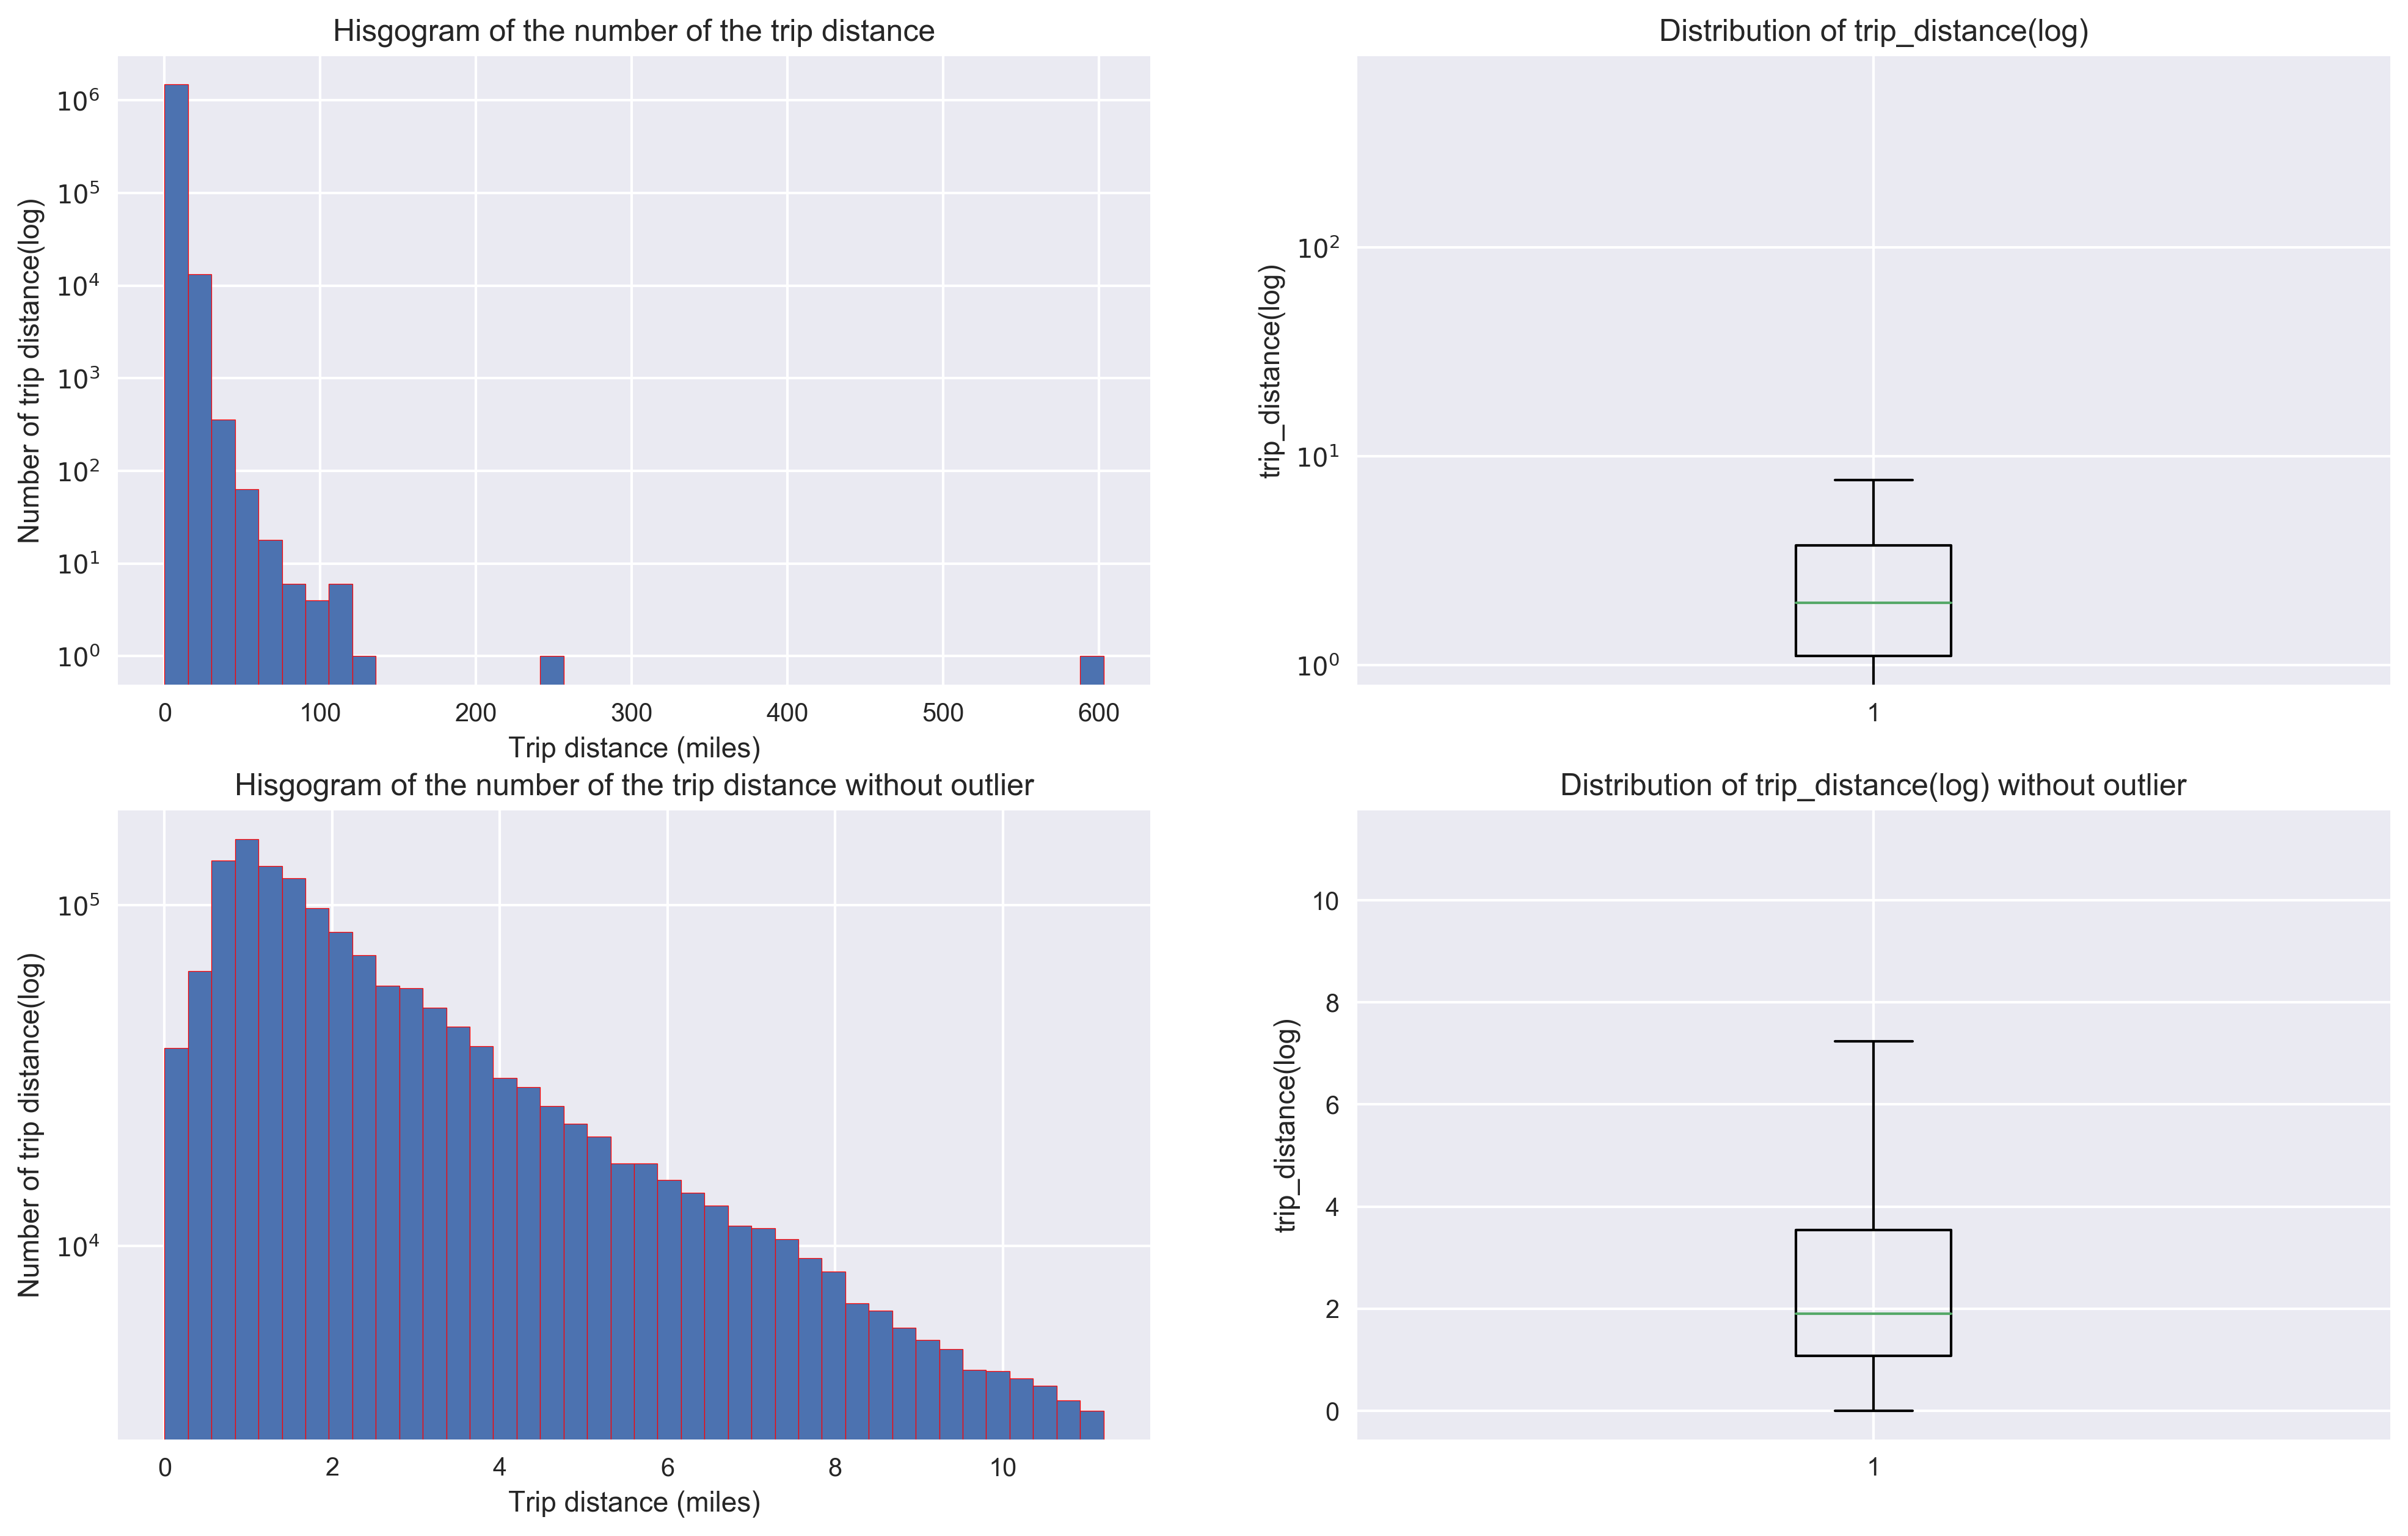

In [438]:
# Removes points that deviate more than 3 times the standard deviation from the median
without_outlier=data[~((data['Trip_distance']-data['Trip_distance'].median()).abs()>3*data['Trip_distance'].std())]

fig=plt.figure(dpi=300, figsize=(16, 10))

#Plot a histogram of Trip Distance without removing outlier
ax1=fig.add_subplot(2,2,1)
ax1.hist(data['Trip_distance'],bins=40,edgecolor='red')
ax1.set_yscale('log') # log transform to scale the data
ax1.set_xlabel('Trip distance (miles)')
ax1.set_ylabel('Number of trip distance(log)')
ax1.set_title('Hisgogram of the number of the trip distance')

#Plot a boxplot of Trip Distance without removing outlier
ax2=fig.add_subplot(2,2,2)
ax2.boxplot(data['Trip_distance'])
ax2.set_yscale('log')# log transform to scale the data
ax2.set_ylabel('trip_distance(log)')
ax2.set_title('Distribution of trip_distance(log)')

#Plot a histogram of Trip Distance with outlier removed
ax3=fig.add_subplot(2,2,3)
ax3.hist(without_outlier['Trip_distance'],bins=40,edgecolor='red')
ax3.set_yscale('log')# log transform to scale the data
ax3.set_xlabel('Trip distance (miles)')
ax3.set_ylabel('Number of trip distance(log)')
ax3.set_title('Hisgogram of the number of the trip distance without outlier')

#Plot a boxplot of Trip Distance with outlier removed
ax4=fig.add_subplot(2,2,4)
ax4.boxplot(without_outlier['Trip_distance'])
ax4.set_ylabel('trip_distance(log)')
ax4.set_title('Distribution of trip_distance(log) without outlier')

plt.show()

##### Question 2.2
*  Report any structure you find and any hypotheses you have about that structure.
    * Juding from upper left histogram plot, in this case,the outlier is regared that a point deviating more than three times from its median,remove the ouliter and see the any changes in distribution without outlier in lower left histogram.
    * The distributions of Trip Distance are assymentric and with or without outliers, the distributions are skewed to the right, that is to say the median is less than mean value, which could also be seen from boxplot in right hand side. Both distributions have a structure of a lognormal distribution. 
    * Since the data of Trip Distance is not normally distributed and rougly 50% of data fell into below 7.4 miles,that may lead to hypothesize that people are more likely to taka shorter trips rather longer trips for some common reasons. For example,it is more common for someone taking taxi to company just to avoid being later,rather than running longer trips to airport picking someone,especially in NYC
    * The distribution somehow reveals people preference on taxi riding in NYC which will be further investigated in the following part 

###### Question 3.1
* Report mean and median trip distance grouped by hour of day.

In [12]:
#First convert the datetime to appropriate format
data['datetime']=pd.to_datetime(data['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")
#Extract hour of day from date time value to represent the time of day
data['hour of day']=data['datetime'].dt.hour
#Calcualte the mean and median value of Trip Distance group by hour of day
data.groupby('hour of day')['Trip_distance'].agg({'mean trip distance':np.mean,'median trip distance':np.median})

,median trip distance,mean trip distance
hour of day,,
0,2.20,3.115276
1,2.12,3.017347
2,2.14,3.046176
3,2.20,3.212945
4,2.36,3.526555
5,2.90,4.133474
6,2.84,4.055149
7,2.17,3.284394
8,1.98,3.048450


###### Question 3.2
* We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

Travellers to New York have three main airports to choose from: John F Kennedy (JFK) and La Guardia (LGA) in the Queens borough of NYC itself, and Newark (EWR) across the river from Manhattan in New Jersey.By looking at data dictionray describing green taxi,the RateCodeId(2) and RateCodeId(3) stand for JFK and Newark respectively,there is no corresponding code for La Guardia (LGA).

In [202]:
#Select the trip data from/to JFK/Newark airport
trips_airport=data[(data.RateCodeID==2)|(data.RateCodeID==3)]
print "The number of trips originate or terminate at one of NYC area airports is",str(trips_airport.shape[0])
#The average fair may be higher because replace Total Amount smaller than 2.5 with its median value 
print "The average fair of trips originate or terminate at one of NYC area airports is $",trips_airport.Fare_amount.mean()

The number of trips originate or terminate at one of NYC area airports is 5552
The average fair of trips originate or terminate at one of NYC area airports is $ 51.3667146974


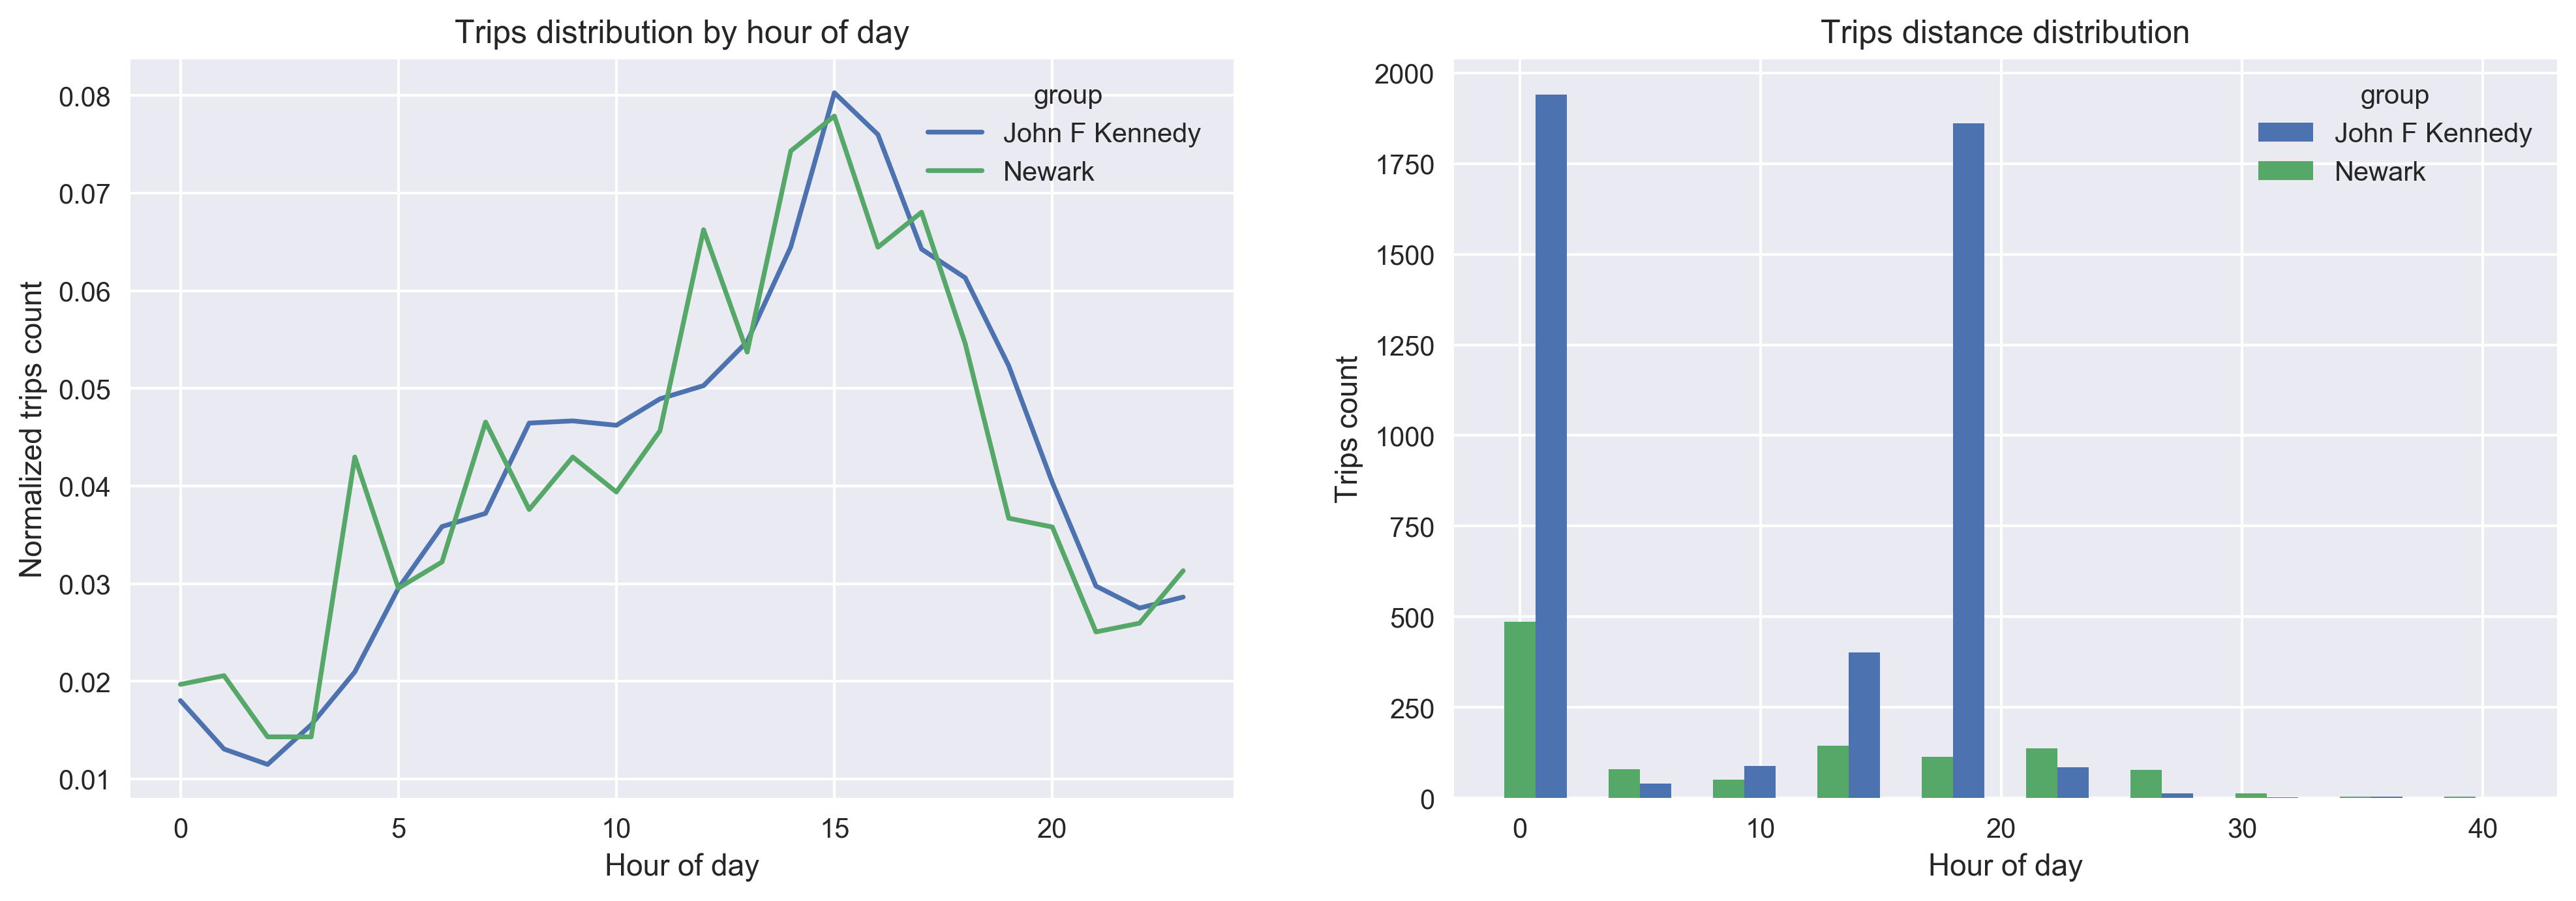

In [64]:
#Select the trip data from/to John F Kennedy 
trips_airport_JFK=trips_airport[trips_airport['RateCodeID']==2]
#Select the trip data from/to Newark
trips_airport_NEW=trips_airport[trips_airport['RateCodeID']==3]


fig=plt.figure(dpi=300, figsize=(16, 5))
ax1=fig.add_subplot(1,2,2)

#Cut trip_distance into groups
bins = np.histogram(trips_airport_JFK['Trip_distance'],normed=True)[1]
new = np.histogram(trips_airport_NEW['Trip_distance'],bins=bins,normed=False)
jfk =np.histogram(trips_airport_JFK['Trip_distance'],bins=bins,normed=False)

#Set the width value for each group 
width = .3*(bins[1]-bins[0])
#Draw Trip distribution barplot for JFK and Newark and make comparsion
ax1.bar(bins[:-1]+width,jfk[0],alpha=1,width=width)
ax1.bar(bins[:-1],new[0],alpha=1,width=width)
ax1.set_xlabel('Hour of day')
ax1.set_ylabel('Trips count')
ax1.set_title('Trips distance distribution')
ax1.legend(['John F Kennedy','Newark'],loc='best',title='group')

#Draw a plot of Trips distribution for JFK and Newark and make comparsion 
ax2=fig.add_subplot(1,2,1)
#count number trip distance and sort by index
count_trip_JFK=pd.value_counts(trips_airport_JFK['hour of day'],normalize=True).sort_index() 
count_trip_NEW=pd.value_counts(trips_airport_NEW['hour of day'],normalize=True).sort_index()
ax2.plot(count_trip_JFK)
ax2.plot(count_trip_NEW)
ax2.set_xlabel('Hour of day')
ax2.set_ylabel('Normalized trips count')
ax2.set_title('Trips distribution by hour of day')
ax2.legend(['John F Kennedy ','Newark'],loc='best',title='group')

plt.show()

* From barplot,it can be seen that generally John F Kennedy exceeds Newark airplot trips than Newwark,both in overall trip numbers and shorter trip (distance less than 5 miles) or longer trip(about 20) miles.Thus, the JFK has higher fight throughput than Newark in September.

* However, trend of number trips(normalized) for both airports are basically the same, the number of trips comes to the peek at 15:00 pm and fall down in the following.It is interesting to see that trend for John F Kennedy is smoother than Newark, especially in some specific time(4am,7 am.etc),the nomralized number of trips in Newark has reached local peek compared to John F Kennedy.
* To explain the difference in trend.One possible reason is there is fewer flights in Newark compared to JFK juding from barplot,to reduce the opration cost for airport,the pickup/dropup time for taxi is more concentrated distributed in specific time.Also,the airport position matters, it may decides the situaion in flight take off/land, thus affecting the regular hour of taxi drivers 

### 3. Feature Preprocessing

###### Question 4.1 Build a derived variable for tip as a percentage of the total fare.

In [39]:
#Build Tip_percentage variabla
data['Tip_percentage']=100*data['Tip_amount']/data['Total_amount']
print data['Tip_percentage'].describe()

count    1.494926e+06
mean     6.634870e+00
std      8.867740e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: Tip_percentage, dtype: float64


#### 3.1 Converting feature
* Converting to numeric type so it can be used in modeling

In [57]:
#Convert the Store_and_fwd_flag to 1 if string value equals to 'Y'
data['Store_and_fwd_flag']=np.where(data['Store_and_fwd_flag']=='Y',1,0)

#### 3.2 Feature correlation

* When it comes to features used for modeling,it is better to select features that are uncorrelated and therefore better performance of model.
* In this case, concerning the computation expensive as well as redundant features,the number of features is limited.Features related to fees or tip amcount, they are strong correlated. Also,longitute and latitude need to be encoded and processed, this job will be done in further analysis, the features correlations map are shown below

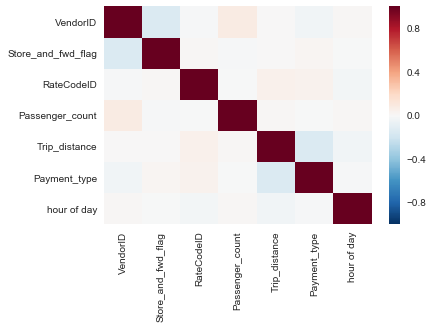

In [60]:
features=['VendorID','Store_and_fwd_flag','RateCodeID','Passenger_count','Trip_distance','Payment_type','hour of day']
#calculated the correlationa and plot correlation map
corr=data[features].corr()
sns.heatmap(corr)

In [62]:
# Converts data frame to its Numpy-array representation.
X =data[features].as_matrix().astype(np.float)
y=np.array(data['tip_percentage'])
print "Feature space holds %d observations and %d features" % X.shape

Feature space holds 1494926 observations and 7 features


### 4. Model Training and Evalution

##### Question 4.2 Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

*  RandomForest will be applied to this problem. 
    * First, RandomForest can effectively avoid overfitting problem by using bagging method to add "randomness"
    * Also,as a ensemble model, it has better performance by sampling features and observations training decision trees
    * Then,feature importance can be used to measure each feature contribution to random forest and to better evaluate features.

In [68]:
from sklearn.cross_validation import KFold
#This program does 5-fold. It saves the result at each time as different parts of y_pred. 
#In the end, it returns the y_pred as the result of all the five 5-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

#### 4.1 Model Training

In [65]:
#RandomForest model training and get prediction results
from sklearn.ensemble import RandomForestRegressor as rf
RF_CV_result = run_cv(X,y,rf)

#### 4.2 Model Evaluation

* The result of r^2 is reasonable,the randomforest model can explain the about 0.42 varibility of response variable around the mean, the model performance can be improved using Grid search and adding more features such as geolocations, this part will be left in future work

In [66]:
from sklearn import metrics
print 'RFR test mse:',metrics.mean_squared_error(RF_CV_result,y)
print 'RFR r2:', metrics.r2_score(RF_CV_result,y)

RFR test mse: 31.0733971774
RFR r2: 0.42944250914


### 5. Feature Selection

In [71]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
Payment_type: 0.8749
Trip_distance: 0.0706
hour of day: 0.0316
Passenger_count: 0.013
RateCodeID: 0.0064
VendorID: 0.0028
Store_and_fwd_flag: 0.0006


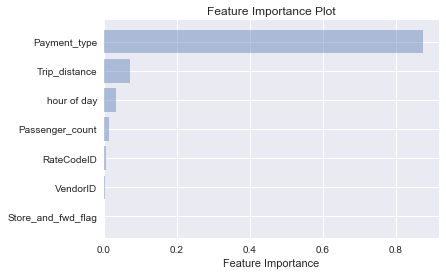

In [72]:
#Define a functino to output feature importance plot
def plot_feature_importance(feature_name,feature_importance):
    ftr_imp_df=pd.DataFrame(sorted(zip(feature_name,feature_importance),key=lambda x:x[1],reverse=False))
                            
    y_pos=np.arange(ftr_imp_df.shape[0])
                            
    plt.barh(y_pos,ftr_imp_df[1],align='center',alpha=0.4)
    plt.yticks(y_pos,ftr_imp_df[0])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance Plot')
                            
    plt.show()
plot_feature_importance(features,importances)

* It can be seen from feature importance output, the payment_type contributes the most to model,intuitively,people may be more likely to pay higher percentage tips using specific payment type like credie card rather than cash. Also,the longer Trip_distance often come with higher fees, longer distance, thus the larger possibility to get higher total_amount,Tolls_amount and so on.
* By futher processing geolocation data such as longitude and latitude, to see the change of feature importance after adding them to model, for time concern,this part will left in further work 

##### Question 5 Option A: Distributions

###### Question 5.1
* Build a derived variable representing the average speed over the course of a trip
     * First, calculate trip time duration by substracting pickup time dropoff time then convert trip time from seconds to miniutes
     * Second, build speed feature by dividing trip_distance by trip time duration to get speed per hour
     * Finally,process speed value since some of them are invalid

In [81]:
# Set the begining date as first week of september in 2015 
ref_week = dt.datetime(2015,9,1).isocalendar()[1] 

# Convert the datetime to appropriate format for futher preprocessing
data['Lpep_dropoff_datetime']=pd.to_datetime(data['Lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S")
data['lpep_pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

# Extract the week information from date time then get the number of week by using ref_week
data['Week'] = data['lpep_pickup_datetime'].apply(lambda x:x.isocalendar()[1])
data['Week'] =data['Week']-ref_week+1

In [105]:
#To keep precise, calculate trip time duration to seconds first then convert to minutes, data type of trip_mins is float64
data['Trip_mins']=(data['Lpep_dropoff_datetime']-data['lpep_pickup_datetime']).apply(lambda x:x.total_seconds()/60.0)

#Calculate the speed per hour(MPH)
data['Speed_hr']=data['Trip_distance']/(data['Trip_mins']/60.0)
data['Speed_hr'].describe()

#3192 observations from data with their Speed_hr value missing or invalid, so replace it with median value
indice = data[(data['Speed_hr'].isnull()) | (data['Speed_hr']>240)].index
len(data.loc[indice,'Speed_hr'])/data.shape[0]

#Replace missing value and invlid data with median value
data.loc[indice,'Speed_hr']=11.76820

#See descriptive of speed
pd.DataFrame(data['Speed_hr'].describe())

,Speed_hr
count,1.494926e+06
mean,1.291039e+01
std,6.994308e+00
min,0.000000e+00
25%,9.315526e+00
50%,1.176820e+01
75%,1.503297e+01
max,2.400000e+02


##### Question 5.2
* Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?
    * First, have a look at data and check assumption
    * Second, here comes two ways to solve the problem,one is to conduct t test pair by pair totally 10 times,the other method is to use one way ANOVA test to make multiple groups test.

* Chcek assumptions

In [99]:
#First look at descriptive statistics of Speed grouped by week
pd.DataFrame(data.groupby('Week')['Speed_hr'].describe()).unstack()

Speed_hr                                                            \
         count       mean       std  min       25%        50%        75%   
Week                                                                       
1     299398.0  13.357150  7.167316  0.0  9.643019  12.071262  15.517241   
2     364078.0  12.688377  7.013895  0.0  9.078947  11.583596  14.815884   
3     360212.0  12.683308  6.834153  0.0  9.196507  11.608163  14.762590   
4     339110.0  13.159598  7.026468  0.0  9.545251  11.975806  15.311670   
5     132128.0  12.489328  6.813894  0.0  8.984694  11.403192  14.594595   

                  
             max  
Week              
1     240.000000  
2     240.000000  
3     240.000000  
4     240.000000  
5     237.133603

(6, 18)

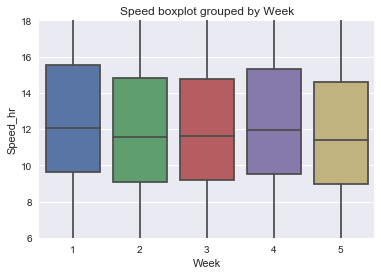

In [90]:
#Draw boxplot for fives samples data and focus on the mean value
ax=sns.boxplot(x='Week',y='Speed_hr',data=data)
ax.set_title('Speed boxplot grouped by Week')
ax.set_ylim(6,18)

* Judging from the plot, the five mean the mean value of speed from different weeks seems to be closed
    * Since the sample size of data is very large,according to central limited theorem, the assumptions of normality is met, Also,t test has strong power with consistent test result dealing with equal standard deviation assumption, and Welch-ttest
    can be used when standard deviations are not equal.In last, assume that the data from different weeks are independent from each other, to be specific, the speed between weeks are not correlated. So assumptions of test are met

* Conduct test
    * One-way ANOVA
        * Null hypothese is that there is no difference in all speeds among weeks, the alternative hypothesis is speed among weeks are not all the same
        * Juding from result, there is enough evidence to suggest that at 95% confidence interval(p near to 0), the speed among weeks are not all the same

In [176]:
from scipy.stats import f_oneway
weeks=range(1,6)
cmd="f_oneway("
for w in weeks:
        cmd+="data[data['Week']=="+str(w)+"]['Speed_hr'],"
cmd=cmd[:-1]+")"
print eval(cmd)

F_onewayResult(statistic=720.73754711766196, pvalue=0.0)


* Conduct test 
 * T test(pair by pair)
    * Null hypothese,for any pairis that there is no difference in speed among between two weeks,alternative hypothese, is there exsits difference in speed among between two weeks,
    * Judging from result, becase there is not enough evidence to reject null hypothesis because the t test statistic is not significant(pvalue=0.75) in between week1 and week2 speed at 95% confidence intervel, there is not enough evidence to suggest that speed in weeks are not all the same 

In [197]:
# Conduct t-test pair by pair
from scipy.stats import ttest_ind
weeks = pd.unique(data.Week)
pvalues = []
for i in range(1,len(weeks)+1): 
    for j in range(i+1,len(weeks)+1):# Ensure that j>i, to reduced times of t test 
        #run test for each pair and store the result into pvalue list
                pvalues.append((i,j,ttest_ind(data[data['Week']==i]['Speed_hr'],data[data['Week']==j]['Speed_hr'],equal_var=False)[1]))

pvalues = pd.DataFrame(pvals,columns=['Week1','Week2','Pvalue']).sort_index()
#select result with pvalue larger than 0.05
pvalues[(pvalues['Pvalue']>0.05) & (pvalues['Week1']<pvalues['Week2'])]

,Week1,Week2,Pvalue
7,2,3,0.75541


* Discussion
    * Now the result using t-test and Anova test comes to conflict, I am likely to adopt the Anova result,One reason is that for multiple group comparsions,Anova test is better, t test is more appropriate for two sample test generally, so follow the Anova test reult, that the mean speed per hour between weeks are not all the same at 95% confidence interval
    * Hypothesis for difference.
        * First, the test is only conducted based on Spetemeber data, the data selected might be biased, so the conclusion can not be generalized to other months like May.etc 
        * One hypothesis is that difference in number trips from airport among weeks causes the difference in speeds.The speed from/to Newark and John F Kennedy is different and it is known that trips number in two airport is different, so the trip number among weeks may be affecting the speed in a way. 

##### Question 5.3
* Can you build up a hypothesis of average trip speed as a function of time of day?

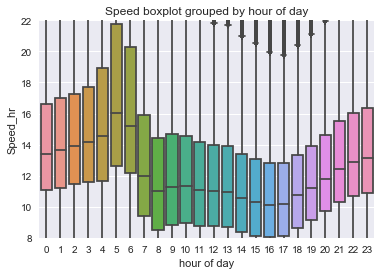

In [86]:
#draw boxplot of speed grouped by hour of day
ax2=sns.boxplot(x='hour of day',y='Speed_hr',data=data)
ax2.set_ylim(8,22)
ax2.set_title('Speed boxplot grouped by hour of day')

* Juding from plot,the speed is changing over the time of day,speed keeps increasing from 8:00 pm at night to 5:00 am in next morning, while in the daytime, the speed keeps relatively low value, therefore traffic in daytime is worse than late at night,it seems like traffic is best at dawn(earkt morning),therefore the hypothesis is traffic is faster in early morning and late nignt than daytime